In [1]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar100
import tensorflow.keras.applications as apps
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
from tensorflow.keras.losses import categorical_crossentropy
import tensorflow as tf
# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt
# Learning rate (0.0001, 0.1, 0.5), dropout rate (0, 0.4, 0.8), architecture (alexNet, vggNet, resnet), optimisers (sgd, adam, rmsprop), data aug
learningRates = [0.0001, 0.1, 0.3]
dropoutRates = [0.1, 0.5, 0.85]
print('Libraries imported.')
tf._logging.disable()


2024-04-21 00:46:40.087424: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 00:46:40.201721: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 00:46:40.201789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 00:46:40.204354: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-21 00:46:40.215094: I tensorflow/core/platform/cpu_feature_guar

Libraries imported.


The following constant and variable definitions are needed for the network and training parameters.


In [2]:
#training constants
BATCH_SIZE = 64
N_EPOCH = 100 # use 20 for best initial results
N_CLASSES = 100
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = SGD()

print('Main variables initialised.')

Main variables initialised.


Constant definition for the training set images

In [3]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


__CIFAR-10 data loading and processing__

Loading and preparation of the CIFAR-10 training set.

In [4]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 
idx = np.random.permutation(len(input_X_train))
input_X_train, output_Y_train = input_X_train[idx], output_Y_train[idx]
# # float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


**Visualisation of two sample CIFAR-10 images**

Here we will visualise two sample images from the dataset.

In [5]:
vgg = apps.VGG16(classes=N_CLASSES, weights=None, include_top=False, pooling="max", input_shape=input_X_train[0].shape)
flatten = Flatten()(vgg.layers[-2].output)
dense1 = Dense(2048, activation="relu")(flatten)
dense2 = Dense(2048, activation="relu")(dense1)
predictions = Dense(N_CLASSES, activation="softmax", name="predictions")(dense2)
model = tf.keras.Model(inputs=vgg.inputs, outputs=predictions)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

2024-04-20 22:54:25.652761: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 22:54:25.665043: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 22:54:25.665087: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

2024-04-20 22:54:25.667075: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 22:54:25.667109: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 22:54:25.667127: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 22:54:25.784900: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 22:54:25.784949: I external/local_xla/xla/stream_executor

**Training of the CNN**

This line of code trains the model, saving the results in the history variable.



In [6]:
# training/fitting of the DNN model
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=15, start_from_epoch=25, restore_best_weights=True)
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
# history = model.fit(train_datagen.flow(input_X_train[0:round(len(input_X_train)*(1 - VALIDATION_SPLIT))], 
#                                        output_Y_train[0:round(len(output_Y_train)*(1 - VALIDATION_SPLIT))], 
#                                        batch_size=Bn  ATCH_SIZE), 
#                                        validation_data=train_datagen.flow(
#                                            input_X_train[round(len(input_X_train)*(1 - VALIDATION_SPLIT)):len(input_X_train)],
#                                            output_Y_train[round(len(output_Y_train)*(1 - VALIDATION_SPLIT)):len(output_Y_train)], 
#                                            batch_size=BATCH_SIZE

#                                        ), epochs=N_EPOCH,  verbose=VERBOSE, callbacks=[es])
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE, callbacks=[es])
model.save("vgg_def.keras")
np.save("vgg_def_history.npy", history.history)

Epoch 1/100


2024-04-20 22:54:27.251255: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-04-20 22:54:27.351860: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-20 22:54:27.634337: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


625/625 [==============================] - 11s 14ms/step - loss: 4.6052 - accuracy: 0.0090 - val_loss: 4.6053 - val_accuracy: 0.0079
Epoch 2/100
625/625 [==============================] - 8s 13ms/step - loss: 4.6052 - accuracy: 0.0100 - val_loss: 4.6054 - val_accuracy: 0.0079
Epoch 3/100
625/625 [==============================] - 8s 13ms/step - loss: 4.6051 - accuracy: 0.0104 - val_loss: 4.6055 - val_accuracy: 0.0082
Epoch 4/100
625/625 [==============================] - 8s 13ms/step - loss: 4.6051 - accuracy: 0.0105 - val_loss: 4.6056 - val_accuracy: 0.0079
Epoch 5/100
625/625 [==============================] - 8s 13ms/step - loss: 4.6050 - accuracy: 0.0102 - val_loss: 4.6057 - val_accuracy: 0.0079
Epoch 6/100
625/625 [==============================] - 8s 13ms/step - loss: 4.6050 - accuracy: 0.0106 - val_loss: 4.6058 - val_accuracy: 0.0079
Epoch 7/100
625/625 [==============================] - 8s 13ms/step - loss: 4.6049 - accuracy: 0.0105 - val_loss: 4.6058 - val_accuracy: 0.0079
Epo

**Analysis of the results**

This code generates the test scores, so we can visualise and inspect the model's peformance.

It also plots the accuracy and loss values along the training timescale.


157/157 [==============================] - 1s 6ms/step - loss: 3.3503 - accuracy: 0.2149

Test score/loss: 3.3503386974334717
Test accuracy: 0.21490000188350677
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


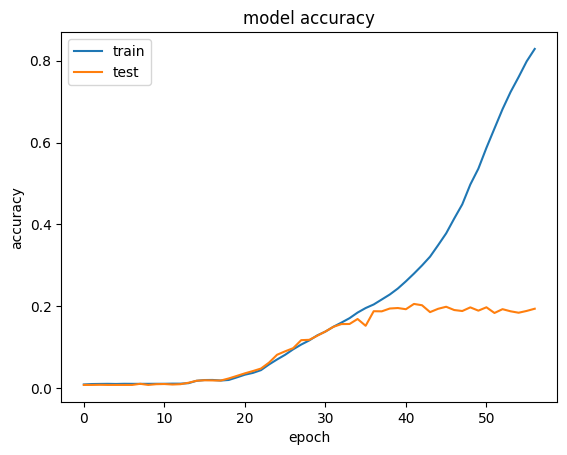

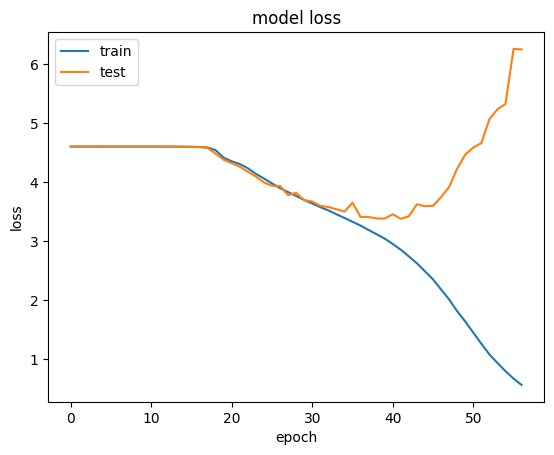

In [7]:
#
model = tf.keras.saving.load_model("vgg_def.keras")
history = np.load("vgg_def_history.npy", allow_pickle='TRUE').item()
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [7]:
for p in dropoutRates:
    vgg = apps.VGG16(classes=N_CLASSES, weights=None, include_top=False, pooling="max", input_shape=input_X_train[0].shape)
    flatten = Flatten()(vgg.layers[-2].output)
    dense1 = Dense(2048, activation="relu")(flatten)
    dropout1 = tf.keras.layers.Dropout(p)(dense1)
    dense2 = Dense(2048, activation="relu")(dropout1)
    dropout2 = tf.keras.layers.Dropout(p)(dense2)
    predictions = Dense(N_CLASSES, activation="softmax", name="predictions")(dropout2)
    model = tf.keras.Model(inputs=vgg.inputs, outputs=predictions)
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
    history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
    model.save(f"vgg_dropout_{p}.keras")
    np.save(f"vgg_dropout_{p}_history.npy", history.history)
    

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
for p in dropoutRates:
    model = tf.keras.saving.load_model(f"vgg_dropout_{p}.keras")
    history = np.load(f"vgg_dropout_{p}_history.npy", allow_pickle='TRUE').item()
    score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
    print("\nTest score/loss:", score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.keys())

    # summarize history for accuracy
    #plt.plot(mo)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [8]:
inp = tf.keras.Input(shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS))
conv1 = tf.keras.layers.Conv2D(kernel_size=11, filters=96, padding="same", strides=(2, 2), activation="relu")(inp)
pool1 = tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1))(conv1)
conv2 = tf.keras.layers.Conv2D(kernel_size=5 , padding="same", filters=256, activation="relu", strides=(1, 1))(pool1)
pool2 = tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1))(conv2)
conv3 = tf.keras.layers.Conv2D(kernel_size=3, filters=384, activation="relu", padding="same", strides=(1, 1))(pool2)
conv4 = tf.keras.layers.Conv2D(kernel_size=3, filters=384, activation="relu", padding="same", strides=(1, 1))(conv3)
conv5 = tf.keras.layers.Conv2D(kernel_size=3, filters=256, activation="relu", padding="same", strides=(1, 1))(conv4)
pool3 = tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(1, 1))(conv5)
flatten = tf.keras.layers.Flatten()(pool3)
dense1 = tf.keras.layers.Dense(units=2048, activation="relu")(flatten)
dense2 = tf.keras.layers.Dense(units=2048, activation="relu")(dense1)
predictions = tf.keras.layers.Dense(units=N_CLASSES, activation="softmax")(dense2)
model = tf.keras.Model(inputs=inp, outputs=predictions)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       8851

In [9]:
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

In [10]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=15, start_from_epoch=25, restore_best_weights=True)

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE, callbacks=[es])
model.save("alexNet_def.keras")
np.save("alexNet_def_history.npy", history.history)

Epoch 1/100
625/625 [==============================] - 10s 15ms/step - loss: 4.6053 - accuracy: 0.0091 - val_loss: 4.6053 - val_accuracy: 0.0078
Epoch 2/100
625/625 [==============================] - 9s 14ms/step - loss: 4.6052 - accuracy: 0.0100 - val_loss: 4.6055 - val_accuracy: 0.0078
Epoch 3/100
625/625 [==============================] - 9s 14ms/step - loss: 4.6052 - accuracy: 0.0104 - val_loss: 4.6056 - val_accuracy: 0.0078
Epoch 4/100
625/625 [==============================] - 9s 14ms/step - loss: 4.6052 - accuracy: 0.0105 - val_loss: 4.6058 - val_accuracy: 0.0078
Epoch 5/100
217/625 [=========>....................] - ETA: 5s - loss: 4.6051 - accuracy: 0.0100

625/625 [==============================] - 9s 14ms/step - loss: 4.6051 - accuracy: 0.0103 - val_loss: 4.6059 - val_accuracy: 0.0078
Epoch 6/100
625/625 [==============================] - 9s 14ms/step - loss: 4.6051 - accuracy: 0.0105 - val_loss: 4.6060 - val_accuracy: 0.0078
Epoch 7/100
625/625 [==============================] - 9s 14ms/step - loss: 4.6051 - accuracy: 0.0104 - val_loss: 4.6061 - val_accuracy: 0.0078
Epoch 8/100
625/625 [==============================] - 9s 14ms/step - loss: 4.6051 - accuracy: 0.0107 - val_loss: 4.6062 - val_accuracy: 0.0078
Epoch 9/100
625/625 [==============================] - 9s 14ms/step - loss: 4.6051 - accuracy: 0.0105 - val_loss: 4.6063 - val_accuracy: 0.0078
Epoch 10/100
625/625 [==============================] - 9s 14ms/step - loss: 4.6051 - accuracy: 0.0105 - val_loss: 4.6063 - val_accuracy: 0.0078
Epoch 11/100
625/625 [==============================] - 9s 14ms/step - loss: 4.6050 - accuracy: 0.0107 - val_loss: 4.6064 - val_accuracy: 0.0078
Ep

157/157 [==============================] - 1s 7ms/step - loss: 3.9042 - accuracy: 0.1565

Test score/loss: 3.9042046070098877
Test accuracy: 0.15649999678134918
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


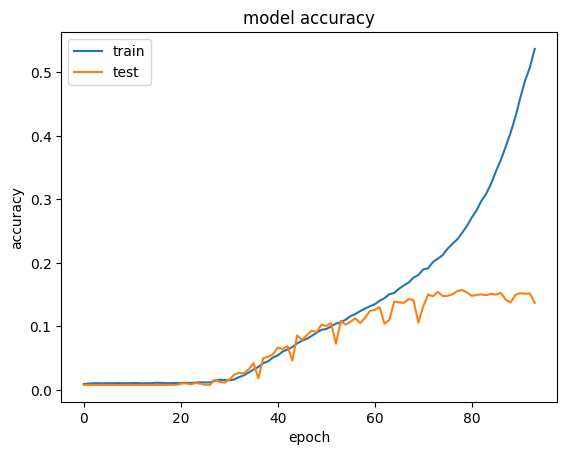

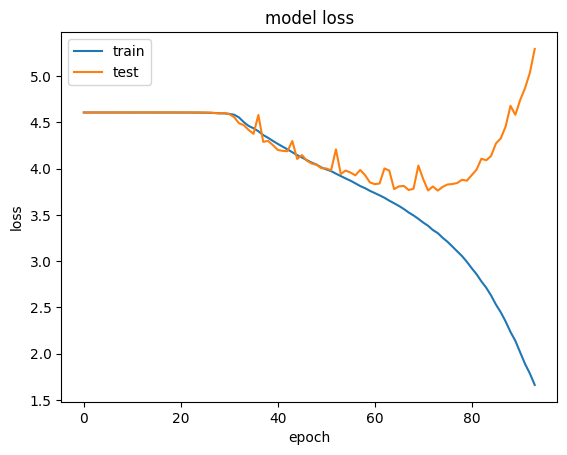

In [11]:
model = tf.keras.saving.load_model("alexNet_def.keras")
history = np.load("alexNet_def_history.npy", allow_pickle='TRUE').item()
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
resNet = apps.ResNet152V2(classes=N_CLASSES, weights=None, include_top=False, pooling="max", input_shape=input_X_train[0].shape)
flatten = Flatten()(resNet.layers[-1].output)
predictions = Dense(N_CLASSES, activation="softmax", name="predictions")(flatten)

model = tf.keras.Model(inputs=resNet.inputs, outputs=predictions)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 18, 18, 64)           0         ['conv1_conv[0][0]']          
                                                                                            

In [13]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=15, start_from_epoch=25, restore_best_weights=True)

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE, callbacks=[es])
model.save("resNet_def.keras")
np.save("resNet_def_history.npy", history.history)

Epoch 1/100
625/625 [==============================] - 43s 54ms/step - loss: 4.3652 - accuracy: 0.0526 - val_loss: 4.9292 - val_accuracy: 0.0143
Epoch 2/100
625/625 [==============================] - 30s 49ms/step - loss: 3.8842 - accuracy: 0.1045 - val_loss: 3.8012 - val_accuracy: 0.1210
Epoch 3/100
625/625 [==============================] - 31s 50ms/step - loss: 3.6567 - accuracy: 0.1408 - val_loss: 3.8248 - val_accuracy: 0.1378
Epoch 4/100
625/625 [==============================] - 30s 48ms/step - loss: 3.4734 - accuracy: 0.1714 - val_loss: 3.5498 - val_accuracy: 0.1722
Epoch 5/100
625/625 [==============================] - 32s 51ms/step - loss: 3.3069 - accuracy: 0.1989 - val_loss: 3.3622 - val_accuracy: 0.1945
Epoch 6/100
625/625 [==============================] - 37s 59ms/step - loss: 3.1552 - accuracy: 0.2266 - val_loss: 3.2709 - val_accuracy: 0.2133
Epoch 7/100
625/625 [==============================] - 35s 57ms/step - loss: 3.0177 - accuracy: 0.2525 - val_loss: 3.2493 - val_ac

157/157 [==============================] - 5s 17ms/step - loss: 4.2059 - accuracy: 0.3292

Test score/loss: 4.205902099609375
Test accuracy: 0.32919999957084656
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


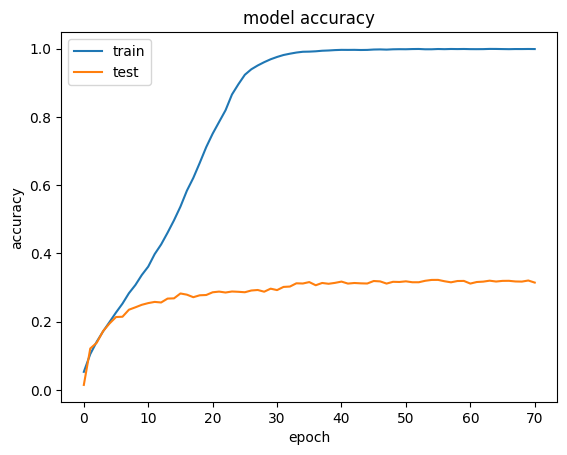

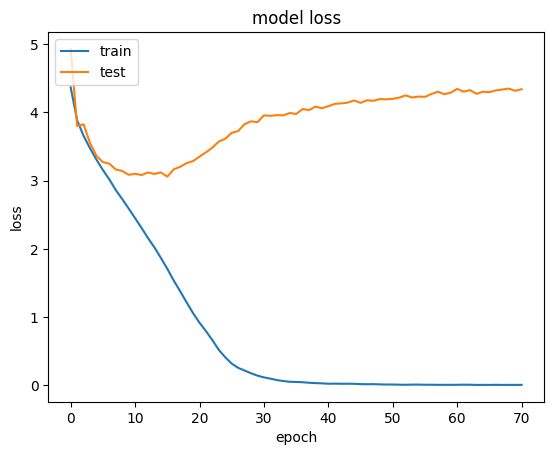

In [16]:
model = tf.keras.saving.load_model("resNet_def.keras")
history = np.load("resNet_def_history.npy", allow_pickle='TRUE').item()
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


Augmenting training set images...


__Training with augmented data__

The function below used the dynamic generation of the augmented data during the training (just in time).

In [15]:

#fit the dataset
datagen.fit(input_X_train)


# train by fitting the model on batches with real-time data augmentation
history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)



Epoch 1/100


/tmp/ipykernel_165422/3979763547.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)


781/781 [==============================] - 48s 57ms/step - loss: 3.7563 - accuracy: 0.1745
Epoch 2/100
781/781 [==============================] - 39s 50ms/step - loss: 3.1647 - accuracy: 0.2274
Epoch 3/100
781/781 [==============================] - 41s 53ms/step - loss: 3.0538 - accuracy: 0.2481
Epoch 4/100
781/781 [==============================] - 38s 49ms/step - loss: 2.9742 - accuracy: 0.2609
Epoch 5/100
781/781 [==============================] - 39s 50ms/step - loss: 2.9112 - accuracy: 0.2734
Epoch 6/100
781/781 [==============================] - 41s 53ms/step - loss: 2.8519 - accuracy: 0.2849
Epoch 7/100
781/781 [==============================] - 40s 51ms/step - loss: 2.8127 - accuracy: 0.2872
Epoch 8/100
781/781 [==============================] - 41s 52ms/step - loss: 2.7617 - accuracy: 0.2988
Epoch 9/100
781/781 [==============================] - 41s 52ms/step - loss: 2.7233 - accuracy: 0.3072
Epoch 10/100
781/781 [==============================] - 42s 53ms/step - loss: 2.6826 

KeyboardInterrupt: 

**Analysis of the Data Augmented, Deeper CNN results**

This generates the test scores and plots for the deeper DNN trained on the augmented data.

157/157 [==============================] - 1s 6ms/step - loss: 4.5297 - accuracy: 0.2882

Test score/loss: 4.529671669006348
Test accuracy: 0.2881999909877777
dict_keys(['loss', 'accuracy'])


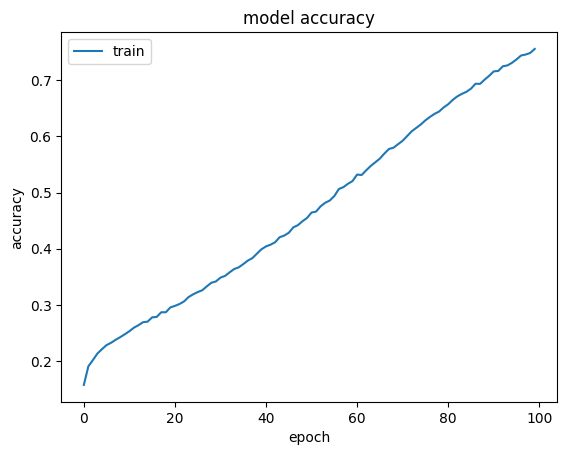

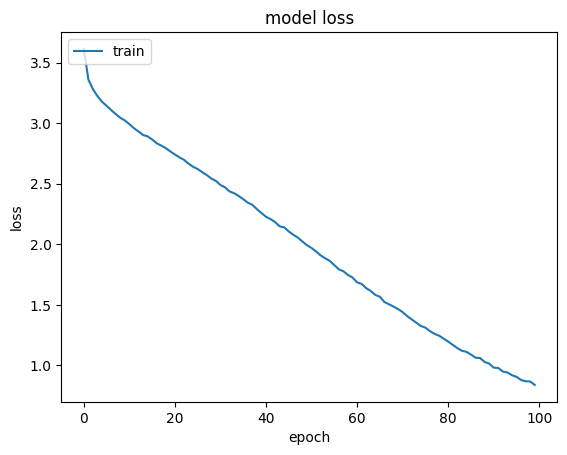

In [ ]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Below is a commented different example of a data augmentation approach. 

But we have carried out plenty of slow, long simulations for this class, and we can stop here.

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(input_X_train)

Conclusions
-------------

Today we learned to train more complex DNNs, and to use data augmentation to further improve the network training and performance.

**Copyright (c)** 2022 Angelo Cangelosi, MIT License. Code and examples adapted from Gulli & Pal (2017) Deep Learning with Kera. Punkt Publishing. With support from Wenjie Huang.